--- 
<strong> 
    <h1 align='center'>04 Multivariate Thinking
</h1> 
</strong>

---

Clone the repository -- __Exploratory Data Analysis in Python__

In [1]:
!git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (397/397), done.
remote: Compressing objects: 100% (340/340), done.
remote: Total 1768 (delta 114), reused 333 (delta 52), pack-reused 1371
Receiving objects: 100% (1768/1768), 181.58 MiB | 29.42 MiB/s, done.
Resolving deltas: 100% (606/606), done.
Checking out files: 100% (790/790), done.


__Change the current working directory__

In [2]:
# import os module 
import os 
   
# to specified path 
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/20_Exploratory Data Analysis in Python/_dataset') 
  
# varify the path using getcwd() 
cwd = os.getcwd() 
  
# print the current directory 
print("Current working directory is:", cwd) 

Current working directory is: /content/CAREER-TRACK-Data-Scientist-with-Python/20_Exploratory Data Analysis in Python/_dataset


In [3]:
ls

'Behavioral Risk Factor Surveillance System(brfss).hdf5'
'General Social Survey(gss).hdf5'
'National Survey of Family Growth(nsfg).hdf5'


`pip install empiricaldist`

Python library that represents
[empirical distributions](https://nbviewer.jupyter.org/github/AllenDowney/empiricaldist/blob/master/empiricaldist/dist_demo.ipynb)




In [4]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.0-cp36-none-any.whl size=10357 sha256=9a954cdcf9b3550a9b108d85537c6832571fd25d2cf4163e073cdeb785bfde44
  Stored in directory: /root/.cache/pip/wheels/a7/18/38/f4791357371b1d677a885149b397cb1437c0ea88939ab642e7
Successfully built empiricaldist


In [5]:
# importing  the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from empiricaldist import Pmf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
brfss = pd.read_hdf('Behavioral Risk Factor Surveillance System(brfss).hdf5', 'brfss')
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


## __01 Regression and causation__

In the BRFSS dataset, there is a strong relationship between **vegetable consumption** and **income**. The income of people who eat 8 servings of vegetables per day is double the income of people who eat none, on average.

__Which of the following conclusions can we draw from this data?__

    A. Eating a good diet leads to better health and higher income.

    B. People with higher income can afford a better diet.

    C. People with high income are more likely to be vegetarians.
 
__Possible Answer__
- A Only
- B Only
- B & C 
- __None of them__

$\color{red}{\textbf{Answer:}}$- __None of them__

This data is consistent with all of these conclusions, but it __does not provide conclusive evidence__ for any of them.

## __02 Using StatsModels__

Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.

__Instructions:__

- Compute the regression of `'_VEGESU1'` as a function of `'INCOME2'` using SciPy's `linregress()`.

- Compute the regression of `'_VEGESU1'` as a function of `'INCOME2'` using StatsModels `smf.ols()`.

In [7]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864099, pvalue=1.378503916248713e-238, stderr=0.002110976356332333)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


$\color{red}{\textbf{NOTE:}}$-  __SciPy__ doesn't do __multiple regression__, so we'll to switch to a new library, __StatsModels__

- `ols` stands for "__ordinary least squares__", another name for **regression**.

- The result from `ols()` represents the model; we have to run dot `.fit()` to get the results. The results object contains a lot of information, but the first thing we'll look at is `params`, which contains the estimated slope and intercept. And we get the same results we got from `SciPy`

## __Dataset:__ *General Social Survey(gss)*

In [8]:
# Income and education
gss = pd.read_hdf('General Social Survey(gss).hdf5', 'gss')
print(gss.columns)

results = smf.ols('realinc ~ educ', data=gss).fit()
print(results.params)

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')
Intercept   -11539.147837
educ          3586.523659
dtype: float64


__StatsModels__:- 

Getting from simple to multiple regression is easy.

In [9]:
# Adding Age
'''
Income also depends on age, so it would be good to include
that in the model, too.
'''
results = smf.ols('realinc ~ educ + age', data=gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

<function matplotlib.pyplot.show>

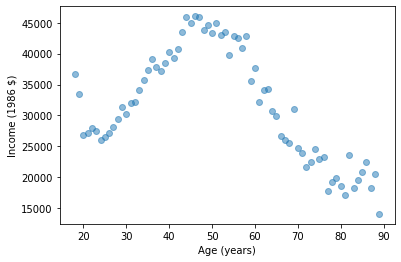

In [10]:
# Income and Age
grouped = gss.groupby('age')
mean_income_by_age = grouped['realinc'].mean()
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show

__Adding a quadratic term__

- To describe a **non-linear relationship**, one option is to add a new variable that is a **non-linear combination** of other variables.

__Example__ we will create a new variable called `age2` that equals age squared.

- Now we can run a regression with both `age` and `age2` on the right side. And here are the results. The slope associated with age is substantial, about $1700 per year. The slope associated with age2 is about -17, which is harder to interpret.

In [11]:
# Adding a quadratic term
gss['age2'] = gss['age']**2
model = smf.ols('realinc ~ educ + age + age2', data=gss)
results = model.fit()
results.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

## **03 Plot income and education**

To get a closer look at the relationship between income and education, let's use the variable `'educ'` to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called `gss`.

__Instructions__

- Group `gss` by `'educ'`. Store the result in `grouped`.

- From grouped, extract `'realinc'` and compute the mean.

- Plot `mean_income_by_educ` as a scatter plot. Specify `'o'` and `alpha=0.5`.

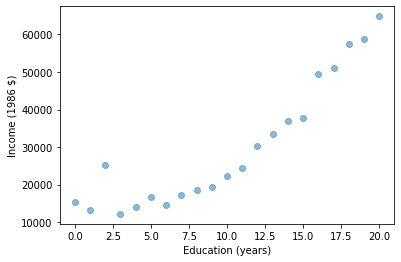

In [12]:
# Group by educ
grouped = gss.groupby('educ')
 
# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()
 
# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)
 
# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

It looks like the relationship between **income** and **education** is **non-linear**.

## __04 Non-linear model of education__

The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

__Instructions__

- Add a column named `'educ2'` to the `gss` DataFrame; it should contain the values from `'educ'` squared.

- Run a regression model that uses `'educ'`, `'educ2'`, `'age'`, and `'age2'` to predict `'realinc'`.

In [13]:
import statsmodels.formula.api as smf
 
# Add a new column with educ squared
gss['educ2'] = gss['educ'] ** 2
gss['age2'] = gss['age']**2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2',data=gss).fit()
 
# Print the estimated parameters
print(results.params) # parameters are hard to interpret.

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


**Multiple Regression Model** to characterize the relationship between **income** and **age**. Because the model is **non-linear**, **the parameters are hard to interpret**. 

## __05 Making predictions__

- At this point, we have a model that predicts income using `age`, `education`, and sex.

- Let's see what it predicts for different levels of education, holding `age` constant.

__Instructions:__

- Using `np.linspace()`, add a variable named `'educ'` to df with a range of values from 0 to 20.

- Add a variable named `'age'` with the constant value 30.

- Use `df` to generate predicted income as a function of education.

In [14]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()
 
# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2
 
# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


## __06 Visualizing predictions__

Now let's visualize the results from the previous cell

__Instructions___

- Plot `mean_income_by_educ` using circles (`'o'`). Specify an `alpha` of `0.5`.

- Plot the prediction results with a line, with `df['educ']` on the x-axis and pred on the y-axis.

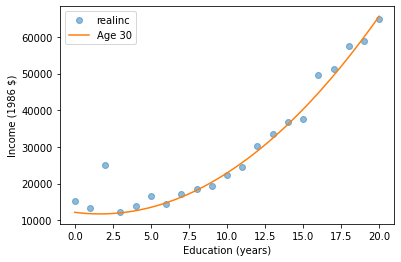

In [15]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ,'o',alpha=0.5, label='realinc')
 
# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')
 
# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

This model captures the relationship pretty well

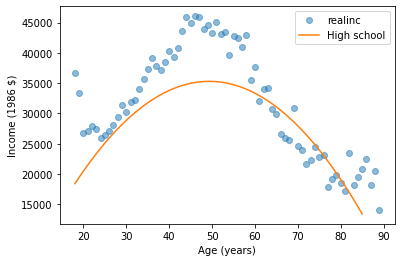

In [16]:
# Modeling income and age
# Make the DataFrame
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2
df['educ'] = 12
df['educ2'] = df['educ']**2

# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('age')
mean_income_by_age = grouped['realinc'].mean()
plt.plot(mean_income_by_age, 'o', alpha=0.5, label='realinc')

# Plot the predictions
pred12 = results.predict(df)
plt.plot(df['age'], pred12, label='High school')

# Label axes
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

- The blue dots show the average income in each age group. 

- The orange line shows the predictions generated by the model, holding education constant.

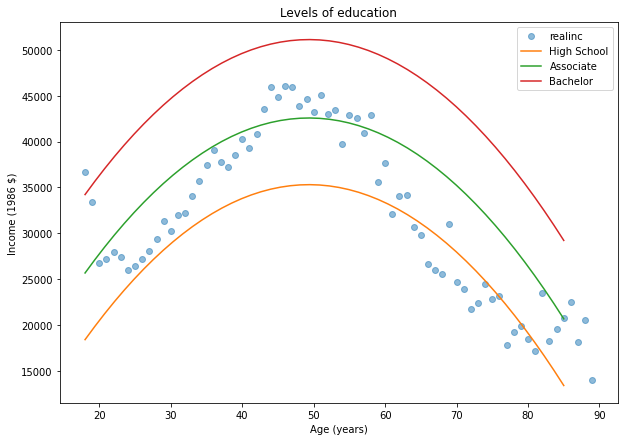

In [17]:
# Multiple Regression
# Levels of education
plt.figure(figsize=(10, 7))
plt.cla()   # Clear axis
plt.clf()   # Clear figure

# Plot mean income in each age group
grouped = gss.groupby('age')
mean_income_by_age = grouped['realinc'].mean()
plt.plot(mean_income_by_age, 'o', alpha=0.5, label='realinc')

df['educ'] = 12
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='High School')


df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')


df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor')


# Label axes
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.title('Levels of education')
plt.legend()
plt.show()

## __07 Predicting a binary variable(Logistic regression)__

Predicting a binary variable
Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable `grass` records the answer to the question "Do you think the use of marijuana should be made legal or not?"

__Instruction:__

- Fill in the parameters of `smf.logit()` to predict grass using the variables `age`, `age2`, `educ`, and `educ2`, along with `sex` as a categorical variable.

- Add a column called `educ` and set it to 12 years; then compute a second column, `educ2`, which is the square of `educ`.

-

-

In [18]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)
 
# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


<Figure size 432x288 with 0 Axes>

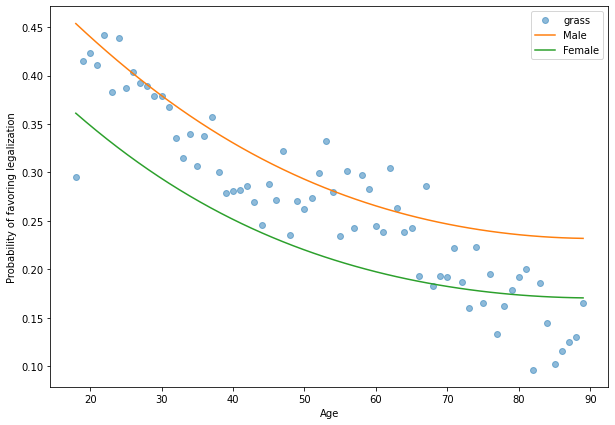

In [25]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
plt.figure(figsize=(10, 7))

grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5, label='grass')

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

<p align='center'>
    <a href="https://twitter.com/F4izy">
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px
            height=50px>
    </a>
    <a href="https://www.linkedin.com/in/mohd-faizy/">
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px>
    </a>
</p>